# Quick Introduction to PyTorch

- First, if you are totally new to Python Programming, quickly read this book: [your journey to fluent python](https://github.com/pro1code1hack/Your-Journey-To-Fluent-Python)

- PyTorch is python-based Deep Learning Library for develop models. To learn the basics of PyTorch, you can go to the tutorial page in [PyTorch website](https://pytorch.org/tutorials/beginner/basics/intro.html).

- Also, you can check the basic_pytorch_exercise.ipynb file to see matrices multiplication and addition


In [1]:
# import all the libraries required

from pprint import pprint
import os
from pathlib import Path
import random
import numpy as np
from tqdm import tqdm
import torch
import torch.nn as nn
from torch import optim
from torch.utils.data import TensorDataset, DataLoader

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# imort our own module
from preprocessing_emails import PreProcessData


import spacy

In [2]:
# for replicability

SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)

# Part I: Reading and Proprocessing Data


In [3]:
current_dir = os.getcwd()
# print("curr dir = ", current_dir)
# access parent folder
parent_folder = Path(current_dir).absolute().parent
# print(parent_folder)

dataset_folder = os.path.join(parent_folder, "phishing-email-dataset")


# smishing_file_path = os.path.join(
#     dataset_folder, "smssmishcollection/SMSSmishCollection.txt"
# )

# print(smishing_file_path)

# df = read_smish_data(smishing_file_path)
# # # df["clean_text"] = df["sms_message"].apply(clean_text)

# corpus = df["sms_message"].tolist()
# cleaned_corpus = [clean_text(doc) for doc in corpus]
# df["clean_text"] = cleaned_corpus
# print(cleaned_corpus[:10])

In [4]:
os.listdir(dataset_folder)

['.DS_Store', '8339691.zip', 'smssmishcollection', '8339691']

In [5]:
# os.listdir(dataset_folder + "/" + "8339691/")

In [6]:
phish_file_path = os.path.join(dataset_folder, "8339691/Nazario_5.csv")

df = pd.read_csv(phish_file_path)
df.head(5)

,sender,receiver,date,subject,body,label,urls
0,"""Hu, Sylvia"" <Sylvia.Hu@ENRON.com>","""Acevedo, Felecia"" <Felecia.Acevedo@ENRON.com>...","Fri, 29 Jun 2001 08:36:09 -0500","FW: June 29 -- BNA, Inc. Daily Labor Report",User ID: enrondlr\nPW: bnaweb22\n\n\n ...,0,"['http://web.bna.com', 'http://pubs.bna.com/ip..."
1,"""Webb, Jay"" <Jay.Webb@ENRON.com>","""Lambie, Chris"" <Chris.Lambie@ENRON.com>","Fri, 29 Jun 2001 09:37:04 -0500",NGX failover plan.,"\nHi Chris, \n\nTonight we are rolling out a ...",0,[]
2,"""Symms, Mark"" <Mark.Symms@ENRON.com>","""Thomas, Paul D."" <Paul.D.Thomas@ENRON.com>","Fri, 29 Jun 2001 08:39:30 -0500",RE: Intranet Site,Rika r these new?\n\n -----Original Message---...,0,['http://eastpower.dev.corp.enron.com/summary/...
3,"""Thorne, Judy"" <Judy.Thorne@ENRON.com>","""Grass, John"" <John.Grass@ENRON.com>, ""Nemec, ...","Fri, 29 Jun 2001 10:35:17 -0500",FW: ENA Upstream Company information,"John/Gerald,\n\nWe are currently trading under...",0,[]
4,"""Williams, Jason R (Credit)"" <Jason.R.Williams...","""Nemec, Gerald"" <Gerald.Nemec@ENRON.com>, ""Dic...","Fri, 29 Jun 2001 10:40:02 -0500",New Master Physical,Gerald and Stacy -\n\nAttached is a worksheet ...,0,[]


In [7]:
pr = PreProcessData()
# pr

In [8]:
corpus = df["body"].tolist()
cleaned_corpus = [pr.clean_text(doc) for doc in corpus]
df["clean_text"] = cleaned_corpus
df.head(5)

,sender,receiver,date,subject,body,label,urls,clean_text
0,"""Hu, Sylvia"" <Sylvia.Hu@ENRON.com>","""Acevedo, Felecia"" <Felecia.Acevedo@ENRON.com>...","Fri, 29 Jun 2001 08:36:09 -0500","FW: June 29 -- BNA, Inc. Daily Labor Report",User ID: enrondlr\nPW: bnaweb22\n\n\n ...,0,"['http://web.bna.com', 'http://pubs.bna.com/ip...",user id enrondlr pw bnaweb original...
1,"""Webb, Jay"" <Jay.Webb@ENRON.com>","""Lambie, Chris"" <Chris.Lambie@ENRON.com>","Fri, 29 Jun 2001 09:37:04 -0500",NGX failover plan.,"\nHi Chris, \n\nTonight we are rolling out a ...",0,[],hi chris tonight we are rolling out a new ...
2,"""Symms, Mark"" <Mark.Symms@ENRON.com>","""Thomas, Paul D."" <Paul.D.Thomas@ENRON.com>","Fri, 29 Jun 2001 08:39:30 -0500",RE: Intranet Site,Rika r these new?\n\n -----Original Message---...,0,['http://eastpower.dev.corp.enron.com/summary/...,rika r these new original message from thom...
3,"""Thorne, Judy"" <Judy.Thorne@ENRON.com>","""Grass, John"" <John.Grass@ENRON.com>, ""Nemec, ...","Fri, 29 Jun 2001 10:35:17 -0500",FW: ENA Upstream Company information,"John/Gerald,\n\nWe are currently trading under...",0,[],johngerald we are currently trading under gtc...
4,"""Williams, Jason R (Credit)"" <Jason.R.Williams...","""Nemec, Gerald"" <Gerald.Nemec@ENRON.com>, ""Dic...","Fri, 29 Jun 2001 10:40:02 -0500",New Master Physical,Gerald and Stacy -\n\nAttached is a worksheet ...,0,[],gerald and stacy attached is a worksheet for...


In [9]:
# Check the number of rows / samples in our dataset
len(df)

3065

In [10]:
df["label"].value_counts()

label
1    1565
0    1500
Name: count, dtype: int64

In [11]:
# print(df["body"].tolist())

In [12]:
# uncomment this to can see one of the cleaned emails
pprint(df["clean_text"].tolist()[:1][0])

('user id  enrondlr pw        bnaweb    original message from  bna highlights '
 'bhighligbnacom sent thursday june    pm to bna highlights subject june   bna '
 'inc daily labor report    daily labor report highlights  table of contents '
 'june     issn   registered web subscribers can access the full text of these '
 'articles by using the url link supplied  information about becoming a '
 'subscriber or signing up for a free web trial is available at httpwebbnacom '
 'or call bna customer relations at  mon  fri  am   pm et   highlights    dc '
 'circuit overturns nlrb decision on workplace conduct policies  a california '
 'firms two workplace policies barring abusive and threatening language and '
 'restricting solicitation and distribution did not constitute unfair labor '
 'practices the district of columbia circuit rules overturning a national '
 'labor relations board decision adtranz abb daimlerbenz transp na inc v nlrb '
 'dc cir no   the board held the workplace conduct pol

# Part II: Feature Extraction: Begginer-level

- In this part, we will use, CountVectorizer, a very basic feature extraction technique for Natural Language Processing (NLP) tasks.


In [13]:
# Spacy tokenizer
# Load Spacy model
nlp = spacy.load("en_core_web_sm")


def spacy_tokenizer(sentence):
    return [word.lemma_ for word in nlp(sentence)]

In [14]:
# A simple corpus (NLP data) with three sentences / texts to show how CountVectorizer works. It counts the number of occurances of a word in a setence or entry (row).

corpus = [
    "His computer was hacked.",
    "also noticed that security is also important",
    "why are emails used for phishing attack?",
]

# Create a Vectorizer Object
vectorizer = CountVectorizer(lowercase=True)

# Learn the vocabulary dictionary and return document-term matrix.
X = vectorizer.fit_transform(corpus)

# Check the fitted vocabulary
print("Vocabulary: ", vectorizer.get_feature_names_out())

# Check the vectorized data
print("Encoded Document is:\n", X.toarray())

Vocabulary:  ['also' 'are' 'attack' 'computer' 'emails' 'for' 'hacked' 'his'
 'important' 'is' 'noticed' 'phishing' 'security' 'that' 'used' 'was'
 'why']
Encoded Document is:
 [[0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0]
 [2 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0]
 [0 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1]]


In [20]:
import warnings

warnings.filterwarnings("ignore")
# Load English tokenizer, tagger, parser, NER and word vectors
nlp = spacy.load("en_core_web_sm")
nlp.max_length = 3642984 + 1
# Get the list of stop words
stop_words = nlp.Defaults.stop_words

# Print the stop words
# print(stop_words)

# Now, simlar to the simple three documents-based feature, we will extract features using CountVectorizer from our phishing email dataset.
# stop_words = list(stopwords.words("english"))  # stop words for English
# Create a Vectorizer Object.
vectorizer = CountVectorizer(
    lowercase=True,
    stop_words=list(stop_words),
    tokenizer=spacy_tokenizer,
    min_df=20,
)

# get all the cleaned emails
email_corpus = df["clean_text"].tolist()

# Learn the vocabulary dictionary and return document-term matrix.
X = vectorizer.fit_transform(email_corpus)

# convert X from scipy sparse matrix to numpy matrix
print("Before conversion, X was ", type(X))

X = X.toarray()
print("After conversion, X is = ", type(X))  # now it is a numpy array

Before conversion, X was  <class 'scipy.sparse._csr.csr_matrix'>
After conversion, X is =  <class 'numpy.ndarray'>


In [21]:
# get all the cleaned emails
email_corpus = df["clean_text"].tolist()
l = []
for i, mail in enumerate(email_corpus):
    # print(i, len(mail))
    l.append(len(mail))

max(l)

3642984

In [22]:
X.shape  # X has 3065 rows and 3781 (vocabularies or features)

(3065, 1675)

In [23]:
X.max()

7602

In [24]:
# read the labels of the emails: if label = 0, the email was benign, if label = 1, the email is phishy / malicious email

y = df["label"].astype(np.int32)

# check the number of benign and malicious emails
y.value_counts()  # we can see that we have 1565 malicious and 1500 normal emails

label
1    1565
0    1500
Name: count, dtype: int64

In [25]:
# split our data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

In [26]:
# normalize our data between 0 and 1
# Min-Max Scaler
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)

In [27]:
# Check the fitted vocabulary
vocabularies = vectorizer.get_feature_names_out()
print(vocabularies)

[' ' '  ' '   ' ... 'youusaa' 'zone' 'â']


In [28]:
# check the total number of vocabularies or unique features we have in our data
len(vocabularies)

1675

In [29]:
# now, we will create a pytorch sensor for training and testing dataset
# This is useful when we have huge data with over 1 Million rows, and cannot fit our computer's RAM. The data loader fetches it based on the batch_size specified.

train_dataset = TensorDataset(
    torch.from_numpy(X_train_scaled), torch.from_numpy(y_train.values).long()
)
test_dataset = TensorDataset(
    torch.from_numpy(X_test_scaled), torch.from_numpy(y_test.values).long()
)

# create data loaders
batch_size = 256
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [30]:
# check if body of the email is empty or if label is empty
df[["body"]].isna().sum()

body    0
dtype: int64

In [31]:
df["label"].isna().sum()

0

# Part III: PyTorch Model Implementation (begginer level)

- In this part, we will use, Single Layer Perceptron to perform binary clasification of emails (i.e., classify emails as benign or malicious / phishing). Embedding a widely used feature extraction technique for Natural Language Processing (NLP) tasks.

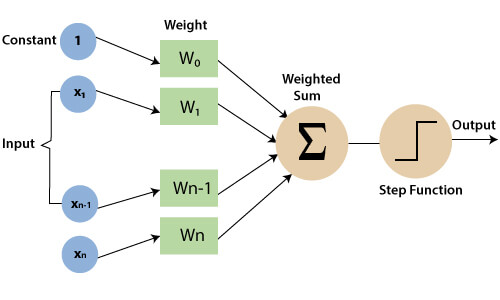 or 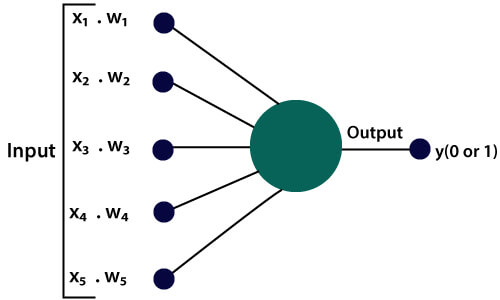

Single-Layer Perceptron architecture: figure is take from [javatpoint](https://www.javatpoint.com/pytorch-perceptron)


In [32]:
# look the implementation of a simple pytorch model / classifier in models.py file

from models import Perceptron

In [33]:
# set the hyperparameters

input_size = X.shape[1]  # number of features/ vocabulary in our data, X
output_size = 1

classifier = Perceptron(input_size, output_size)

# create an optimizer for training classifier
optimizer = optim.Adam(classifier.parameters(), lr=1e-3)

# create a loss function to calculate the loss (error) of our classifier
loss_fn = nn.BCELoss()

print(classifier)

Perceptron(
  (fc): Linear(in_features=1675, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


```
Note: As you can see, our classifier has in_features = 2010, and out_features = 1, followed by sigmoid function. The sigmoid function squashes the output value between 0 and 1. Now, if the output of the sigmoid is close to 0, we say the email is normal. If the output of the sigmoid is close to 1, we say that the email is malicious / phishy.
```


In [34]:
# implement the training function of our email classier
def train_classifier(classifier, optimizer, loss_fn, train_loader, epochs=20):
    training_losses = []
    # training_f1_scores = []

    for epoch in range(epochs):
        print(f"Epoch: {epoch + 1} / {epochs}")
        loss_ = 0.0
        # f1_score_ = 0.0
        for data, labels in tqdm(train_loader):
            # print(labels.shape)
            data = data.float()
            # print(data.max())
            y = labels.long().float()
            # train the classifier
            optimizer.zero_grad()
            # performs sigmoid (torch.matmul(X.T, W) + b) and returns output
            preds = classifier(data)

            # computes the loss function
            # print(preds.max(), y.max())
            loss = loss_fn(preds, y)
            loss.backward()  # compute gradients using back propagation.

            # update the classifier's weights (W) and bia(sb)
            optimizer.step()

            loss_ += loss.item()
            # f1_score_ += f1_score(y.cpu().detach().numpy(), preds.cpu().detach().numpy())
        loss_ = loss_ / len(train_loader)
        training_losses.append(loss_)
        print(f"Train Loss = { loss_:.4f}")

    return training_losses


# train the classifier
EPOCHS = 100
training_losses = train_classifier(
    classifier, optimizer, loss_fn, train_loader, epochs=EPOCHS
)

Epoch: 1 / 100


100%|██████████| 9/9 [00:00<00:00, 133.75it/s]


Train Loss = 0.6836
Epoch: 2 / 100


100%|██████████| 9/9 [00:00<00:00, 485.59it/s]


Train Loss = 0.6669
Epoch: 3 / 100


100%|██████████| 9/9 [00:00<00:00, 500.55it/s]


Train Loss = 0.6530
Epoch: 4 / 100


100%|██████████| 9/9 [00:00<00:00, 490.49it/s]


Train Loss = 0.6387
Epoch: 5 / 100


100%|██████████| 9/9 [00:00<00:00, 477.40it/s]


Train Loss = 0.6263
Epoch: 6 / 100


100%|██████████| 9/9 [00:00<00:00, 523.16it/s]


Train Loss = 0.6147
Epoch: 7 / 100


100%|██████████| 9/9 [00:00<00:00, 532.70it/s]


Train Loss = 0.6040
Epoch: 8 / 100


100%|██████████| 9/9 [00:00<00:00, 524.59it/s]


Train Loss = 0.5921
Epoch: 9 / 100


100%|██████████| 9/9 [00:00<00:00, 511.24it/s]


Train Loss = 0.5845
Epoch: 10 / 100


100%|██████████| 9/9 [00:00<00:00, 552.58it/s]


Train Loss = 0.5737
Epoch: 11 / 100


100%|██████████| 9/9 [00:00<00:00, 465.67it/s]


Train Loss = 0.5636
Epoch: 12 / 100


100%|██████████| 9/9 [00:00<00:00, 510.78it/s]


Train Loss = 0.5560
Epoch: 13 / 100


100%|██████████| 9/9 [00:00<00:00, 441.74it/s]


Train Loss = 0.5483
Epoch: 14 / 100


100%|██████████| 9/9 [00:00<00:00, 497.51it/s]


Train Loss = 0.5399
Epoch: 15 / 100


100%|██████████| 9/9 [00:00<00:00, 531.13it/s]


Train Loss = 0.5318
Epoch: 16 / 100


100%|██████████| 9/9 [00:00<00:00, 479.34it/s]


Train Loss = 0.5253
Epoch: 17 / 100


100%|██████████| 9/9 [00:00<00:00, 529.60it/s]


Train Loss = 0.5207
Epoch: 18 / 100


100%|██████████| 9/9 [00:00<00:00, 571.47it/s]


Train Loss = 0.5105
Epoch: 19 / 100


100%|██████████| 9/9 [00:00<00:00, 593.44it/s]


Train Loss = 0.5058
Epoch: 20 / 100


100%|██████████| 9/9 [00:00<00:00, 486.33it/s]


Train Loss = 0.5005
Epoch: 21 / 100


100%|██████████| 9/9 [00:00<00:00, 547.34it/s]


Train Loss = 0.4931
Epoch: 22 / 100


100%|██████████| 9/9 [00:00<00:00, 437.88it/s]


Train Loss = 0.4896
Epoch: 23 / 100


100%|██████████| 9/9 [00:00<00:00, 529.23it/s]


Train Loss = 0.4833
Epoch: 24 / 100


100%|██████████| 9/9 [00:00<00:00, 423.19it/s]


Train Loss = 0.4781
Epoch: 25 / 100


100%|██████████| 9/9 [00:00<00:00, 377.14it/s]


Train Loss = 0.4697
Epoch: 26 / 100


100%|██████████| 9/9 [00:00<00:00, 460.03it/s]


Train Loss = 0.4652
Epoch: 27 / 100


100%|██████████| 9/9 [00:00<00:00, 490.71it/s]


Train Loss = 0.4623
Epoch: 28 / 100


100%|██████████| 9/9 [00:00<00:00, 531.66it/s]


Train Loss = 0.4578
Epoch: 29 / 100


100%|██████████| 9/9 [00:00<00:00, 553.40it/s]


Train Loss = 0.4499
Epoch: 30 / 100


100%|██████████| 9/9 [00:00<00:00, 487.80it/s]


Train Loss = 0.4478
Epoch: 31 / 100


100%|██████████| 9/9 [00:00<00:00, 481.18it/s]


Train Loss = 0.4455
Epoch: 32 / 100


100%|██████████| 9/9 [00:00<00:00, 511.39it/s]


Train Loss = 0.4409
Epoch: 33 / 100


100%|██████████| 9/9 [00:00<00:00, 578.37it/s]


Train Loss = 0.4336
Epoch: 34 / 100


100%|██████████| 9/9 [00:00<00:00, 517.21it/s]


Train Loss = 0.4299
Epoch: 35 / 100


100%|██████████| 9/9 [00:00<00:00, 516.41it/s]


Train Loss = 0.4266
Epoch: 36 / 100


100%|██████████| 9/9 [00:00<00:00, 523.13it/s]


Train Loss = 0.4234
Epoch: 37 / 100


100%|██████████| 9/9 [00:00<00:00, 566.64it/s]


Train Loss = 0.4203
Epoch: 38 / 100


100%|██████████| 9/9 [00:00<00:00, 499.45it/s]


Train Loss = 0.4156
Epoch: 39 / 100


100%|██████████| 9/9 [00:00<00:00, 478.80it/s]


Train Loss = 0.4121
Epoch: 40 / 100


100%|██████████| 9/9 [00:00<00:00, 493.11it/s]


Train Loss = 0.4091
Epoch: 41 / 100


100%|██████████| 9/9 [00:00<00:00, 450.61it/s]


Train Loss = 0.4049
Epoch: 42 / 100


100%|██████████| 9/9 [00:00<00:00, 495.40it/s]


Train Loss = 0.4006
Epoch: 43 / 100


100%|██████████| 9/9 [00:00<00:00, 545.39it/s]


Train Loss = 0.3979
Epoch: 44 / 100


100%|██████████| 9/9 [00:00<00:00, 479.06it/s]


Train Loss = 0.3935
Epoch: 45 / 100


100%|██████████| 9/9 [00:00<00:00, 531.95it/s]


Train Loss = 0.3933
Epoch: 46 / 100


100%|██████████| 9/9 [00:00<00:00, 533.20it/s]


Train Loss = 0.3884
Epoch: 47 / 100


100%|██████████| 9/9 [00:00<00:00, 506.50it/s]


Train Loss = 0.3826
Epoch: 48 / 100


100%|██████████| 9/9 [00:00<00:00, 520.77it/s]


Train Loss = 0.3805
Epoch: 49 / 100


100%|██████████| 9/9 [00:00<00:00, 501.62it/s]


Train Loss = 0.3797
Epoch: 50 / 100


100%|██████████| 9/9 [00:00<00:00, 490.84it/s]


Train Loss = 0.3752
Epoch: 51 / 100


100%|██████████| 9/9 [00:00<00:00, 565.22it/s]


Train Loss = 0.3729
Epoch: 52 / 100


100%|██████████| 9/9 [00:00<00:00, 453.69it/s]


Train Loss = 0.3694
Epoch: 53 / 100


100%|██████████| 9/9 [00:00<00:00, 493.07it/s]


Train Loss = 0.3646
Epoch: 54 / 100


100%|██████████| 9/9 [00:00<00:00, 418.78it/s]


Train Loss = 0.3664
Epoch: 55 / 100


100%|██████████| 9/9 [00:00<00:00, 437.00it/s]


Train Loss = 0.3608
Epoch: 56 / 100


100%|██████████| 9/9 [00:00<00:00, 494.77it/s]


Train Loss = 0.3605
Epoch: 57 / 100


100%|██████████| 9/9 [00:00<00:00, 496.17it/s]


Train Loss = 0.3577
Epoch: 58 / 100


100%|██████████| 9/9 [00:00<00:00, 523.13it/s]


Train Loss = 0.3534
Epoch: 59 / 100


100%|██████████| 9/9 [00:00<00:00, 518.97it/s]


Train Loss = 0.3510
Epoch: 60 / 100


100%|██████████| 9/9 [00:00<00:00, 517.84it/s]


Train Loss = 0.3473
Epoch: 61 / 100


100%|██████████| 9/9 [00:00<00:00, 515.38it/s]


Train Loss = 0.3452
Epoch: 62 / 100


100%|██████████| 9/9 [00:00<00:00, 523.41it/s]


Train Loss = 0.3409
Epoch: 63 / 100


100%|██████████| 9/9 [00:00<00:00, 495.21it/s]


Train Loss = 0.3410
Epoch: 64 / 100


100%|██████████| 9/9 [00:00<00:00, 494.40it/s]


Train Loss = 0.3433
Epoch: 65 / 100


100%|██████████| 9/9 [00:00<00:00, 533.85it/s]


Train Loss = 0.3371
Epoch: 66 / 100


100%|██████████| 9/9 [00:00<00:00, 553.70it/s]


Train Loss = 0.3335
Epoch: 67 / 100


100%|██████████| 9/9 [00:00<00:00, 462.65it/s]


Train Loss = 0.3315
Epoch: 68 / 100


100%|██████████| 9/9 [00:00<00:00, 503.46it/s]


Train Loss = 0.3317
Epoch: 69 / 100


100%|██████████| 9/9 [00:00<00:00, 506.95it/s]


Train Loss = 0.3287
Epoch: 70 / 100


100%|██████████| 9/9 [00:00<00:00, 447.94it/s]


Train Loss = 0.3263
Epoch: 71 / 100


100%|██████████| 9/9 [00:00<00:00, 524.54it/s]


Train Loss = 0.3243
Epoch: 72 / 100


100%|██████████| 9/9 [00:00<00:00, 534.56it/s]


Train Loss = 0.3212
Epoch: 73 / 100


100%|██████████| 9/9 [00:00<00:00, 482.70it/s]


Train Loss = 0.3182
Epoch: 74 / 100


100%|██████████| 9/9 [00:00<00:00, 448.97it/s]


Train Loss = 0.3179
Epoch: 75 / 100


100%|██████████| 9/9 [00:00<00:00, 481.70it/s]


Train Loss = 0.3139
Epoch: 76 / 100


100%|██████████| 9/9 [00:00<00:00, 492.61it/s]


Train Loss = 0.3142
Epoch: 77 / 100


100%|██████████| 9/9 [00:00<00:00, 489.55it/s]


Train Loss = 0.3099
Epoch: 78 / 100


100%|██████████| 9/9 [00:00<00:00, 507.07it/s]


Train Loss = 0.3084
Epoch: 79 / 100


100%|██████████| 9/9 [00:00<00:00, 542.16it/s]


Train Loss = 0.3067
Epoch: 80 / 100


100%|██████████| 9/9 [00:00<00:00, 480.51it/s]


Train Loss = 0.3053
Epoch: 81 / 100


100%|██████████| 9/9 [00:00<00:00, 483.14it/s]


Train Loss = 0.3051
Epoch: 82 / 100


100%|██████████| 9/9 [00:00<00:00, 486.85it/s]


Train Loss = 0.3016
Epoch: 83 / 100


100%|██████████| 9/9 [00:00<00:00, 490.30it/s]


Train Loss = 0.3014
Epoch: 84 / 100


100%|██████████| 9/9 [00:00<00:00, 575.85it/s]


Train Loss = 0.2992
Epoch: 85 / 100


100%|██████████| 9/9 [00:00<00:00, 444.65it/s]


Train Loss = 0.2956
Epoch: 86 / 100


100%|██████████| 9/9 [00:00<00:00, 503.30it/s]


Train Loss = 0.2984
Epoch: 87 / 100


100%|██████████| 9/9 [00:00<00:00, 511.48it/s]


Train Loss = 0.2975
Epoch: 88 / 100


100%|██████████| 9/9 [00:00<00:00, 480.69it/s]


Train Loss = 0.2941
Epoch: 89 / 100


100%|██████████| 9/9 [00:00<00:00, 177.38it/s]


Train Loss = 0.2933
Epoch: 90 / 100


100%|██████████| 9/9 [00:00<00:00, 334.41it/s]


Train Loss = 0.2880
Epoch: 91 / 100


100%|██████████| 9/9 [00:00<00:00, 489.46it/s]


Train Loss = 0.2884
Epoch: 92 / 100


100%|██████████| 9/9 [00:00<00:00, 426.99it/s]


Train Loss = 0.2847
Epoch: 93 / 100


100%|██████████| 9/9 [00:00<00:00, 451.97it/s]


Train Loss = 0.2836
Epoch: 94 / 100


100%|██████████| 9/9 [00:00<00:00, 497.30it/s]


Train Loss = 0.2832
Epoch: 95 / 100


100%|██████████| 9/9 [00:00<00:00, 516.00it/s]


Train Loss = 0.2812
Epoch: 96 / 100


100%|██████████| 9/9 [00:00<00:00, 493.29it/s]


Train Loss = 0.2791
Epoch: 97 / 100


100%|██████████| 9/9 [00:00<00:00, 473.73it/s]


Train Loss = 0.2773
Epoch: 98 / 100


100%|██████████| 9/9 [00:00<00:00, 486.94it/s]


Train Loss = 0.2789
Epoch: 99 / 100


100%|██████████| 9/9 [00:00<00:00, 503.77it/s]


Train Loss = 0.2745
Epoch: 100 / 100


100%|██████████| 9/9 [00:00<00:00, 497.65it/s]

Train Loss = 0.2715


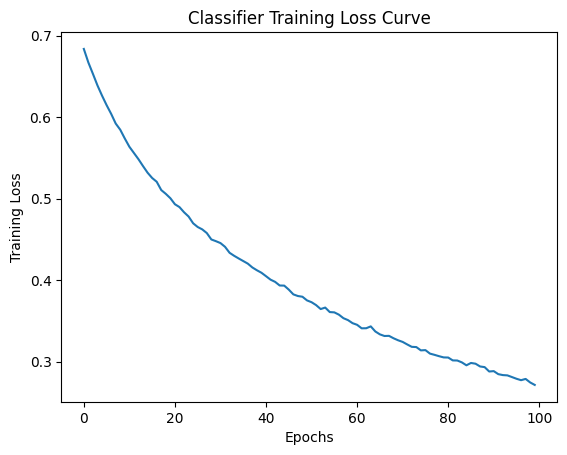

In [35]:
x = torch.arange(0, EPOCHS)
plt.plot(x, training_losses)
plt.title("Classifier Training Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.show()

In [36]:
# evaluate the classifier's performance on the testing set using accuracy, precision, recall, and f1 score


def evaluate_classifier(classifier, test_loader):
    with torch.no_grad():
        # set the classifier on eval mode
        classifier.eval()

        preds = []
        targets = []

        for data, labels in test_loader:
            data = data.float()
            y = labels.data.long().tolist()
            y_pred = classifier(data)
            y_pred = torch.round(y_pred).long().tolist()

            # keep all target values in ground_truth list
            targets.extend(y)
            # keep all predicted values in preds list
            preds.extend(y_pred)

        # get accuracy, recall, precision, and f1_score
        acc = accuracy_score(targets, preds) * 100
        prec = precision_score(targets, preds) * 100
        recall = recall_score(targets, preds) * 100
        f1 = f1_score(targets, preds) * 100
        print(f"Accuracy = {acc:.2f}%")
        print(f"Precision = {prec:.2f}%")
        print(f"Recall = {recall:.2f}%")
        print(f"F1 Score = {f1:.2f}%")


evaluate_classifier(classifier, test_loader)

Accuracy = 93.70%
Precision = 89.77%
Recall = 98.94%
F1 Score = 94.13%


In [37]:
# save the min-max scaler and feature extractor (i.e., the countvectorizer)

import joblib

# save models
joblib.dump(vectorizer, "vectorizer.joblib")
joblib.dump(min_max_scaler, "scaler.joblib")

['scaler.joblib']

In [38]:
# save pytorch model
torch.save(classifier.state_dict(), "classifier.pt")

# [Optional]:Deploying your model online for public use

There is also a streamlit_app.py file in this repository. If you wish to deploy your model for public use:

- you can create github account

- create a repository and upload your (this) code to github repo

- create streamlit cloud community account

- connect streamlit account with your github account.

- deploy your code to streamlit cloud [tutorial](https://streamlit.io/cloud)

- Now, you and anyone else can access and use your model. Congratulations!
